<a href="https://colab.research.google.com/github/GustavoBD-Dev/AnalyticalModelsWithPythonCourse/blob/Session-7/21_Clustering(K_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering con K-means**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from scipy.spatial import distance

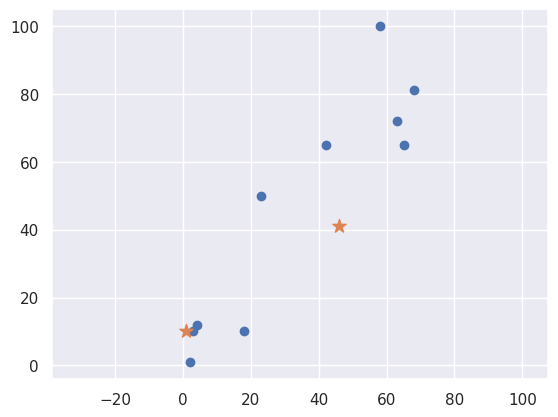

[ 1 10] [46 41]


In [ ]:
# X Conjunto de datos de entrada. Dos características y 10 datos
X = np.array([[2,1],[3,10],[4,12],[18,10],[23,50],[65,65],[68,81],[63,72],[42,65],[58,100]])

plt.axis('equal')
plt.scatter(X[:,0],X[:,1])

# Iniciamos los centroides
ck = np.random.randint(np.min(X),np.max(X), size=(2, 2))

plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.show()
print(ck[0,:],ck[1,:])

[ 1 10] [46 41]
iteration:  0


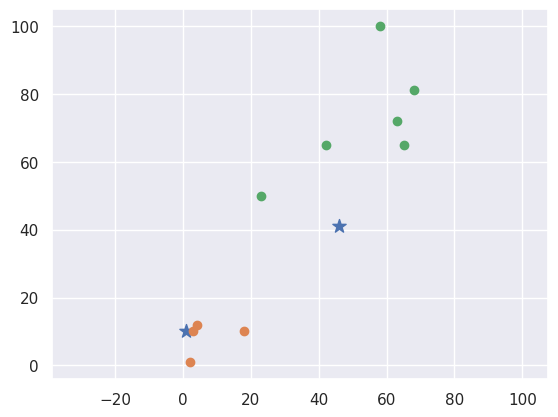

[6 8] [53 72]
iteration:  1


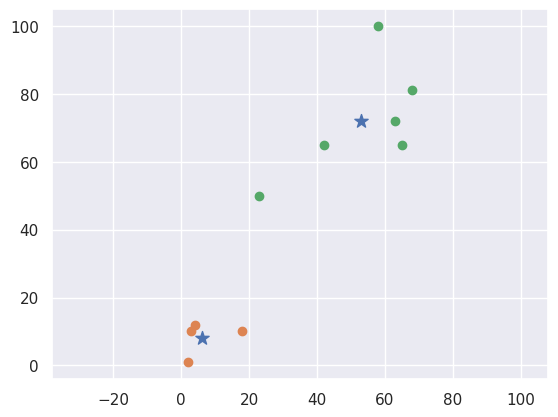

[6 8] [53 72]
iteration:  2


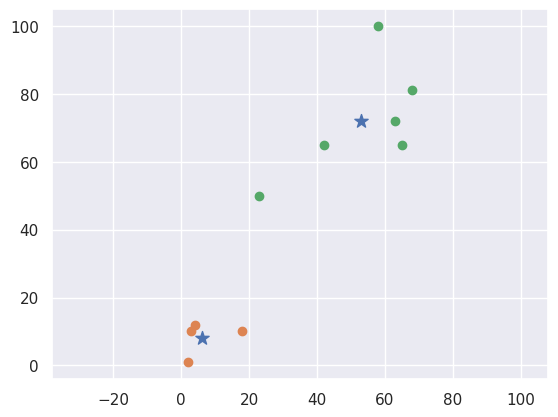

[6 8] [53 72]
iteration:  3


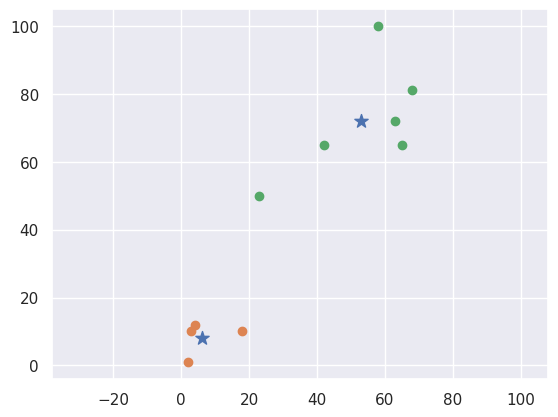

[6 8] [53 72]
iteration:  4


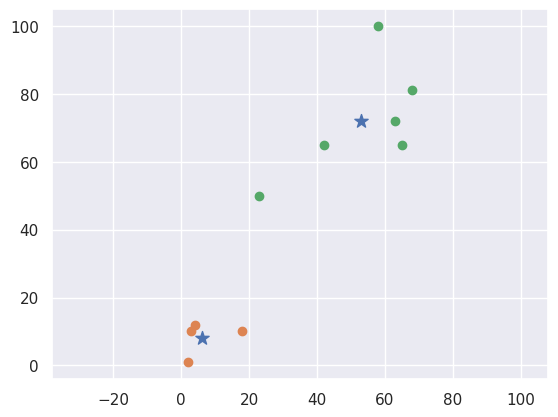

In [ ]:
# Calculamos las distancias de cada dato al centroide y reasignamos a los conjuntos C1 y C2
for iteration in range(5):
  C1 = []
  C2 = []
  i=0
  print(ck[0,:],ck[1,:])
  for x in X:
    dst1 = distance.euclidean(X[i,:], ck[0,:])
    dst2 = distance.euclidean(X[i,:], ck[1,:])

    if dst1 < dst2:
      C1.append(X[i,:])
    else:
      C2.append(X[i,:])
    i = i+1

  print('iteration: ', iteration)

  AC1=np.array(C1)
  AC2=np.array(C2)

  plt.axis('equal')
  plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
  plt.scatter(AC1[:,0],AC1[:,1], label='True Position')
  plt.scatter(AC2[:,0],AC2[:,1], label='True Position')
  plt.show()

  # Actualizamos las coordenadas de los centroides
  ck[0,0] = np.mean(AC1[:,0])
  ck[0,1] = np.mean(AC1[:,1])

  ck[1,0] = np.mean(AC2[:,0])
  ck[1,1] = np.mean(AC2[:,1])

##**Predicción**

In [ ]:
# Dado un nuevo dato xn, se asigna al conjunto C1 o C2 teniendo en cuenta la distancia
# del elemento a los centroides de cada grupo

# xn, nuevo dato
xn = (20,30)

# Distancia de xn a cada centroide
dst1 = distance.euclidean(xn, ck[0,:])
dst2 = distance.euclidean(xn, ck[1,:])

if dst1 < dst2:
  print('El dato Xn pertenece al cluster:{} con centroide {}'.format(1,ck[0,:]))
else:
  print('El dato Xn pertenece al cluster:{} con centroide {}'.format(2,ck[1,:]))

  plt.axis('equal')

  plt.scatter(xn[0],xn[1],s=100,marker='o')
  plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
  plt.scatter(AC1[:,0],AC1[:,1], label='True Position')
  plt.scatter(AC2[:,0],AC2[:,1], label='True Position')
  plt.show()

El dato Xn pertenece al cluster:1 con centroide [6 8]


###**2. Kmeans con Scikit Learn**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0,stratify = digits.target)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(Xtrain)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  2.98507463e-02,  4.18656716e+00,
         1.31492537e+01,  1.11343284e+01,  2.94776119e+00,
         3.73134328e-02, -3.74700271e-16,  6.07153217e-18,
         8.95522388e-01,  1.24701493e+01,  1.31716418e+01,
         1.12835821e+01,  1.13805970e+01,  1.03731343e+00,
        -8.32667268e-17,  1.30104261e-18,  3.79104478e+00,
         1.39925373e+01,  5.29104478e+00,  2.20895522e+00,
         1.22686567e+01,  3.64179104e+00,  4.16333634e-17,
         0.00000000e+00,  5.23880597e+00,  1.25746269e+01,
         2.17910448e+00,  2.98507463e-01,  9.31343284e+00,
         6.34328358e+00,  1.73472348e-18,  0.00000000e+00,
         5.90298507e+00,  1.14402985e+01,  8.95522388e-01,
         1.49253731e-02,  9.12686567e+00,  7.04477612e+00,
         0.00000000e+00, -1.04083409e-17,  3.52985075e+00,
         1.31940299e+01,  1.69402985e+00,  1.46268657e+00,
         1.15149254e+01,  5.71641791e+00, -4.51028104e-17,
        -5.20417043e-18,  8.58208955e-01,  1.32686567e+0

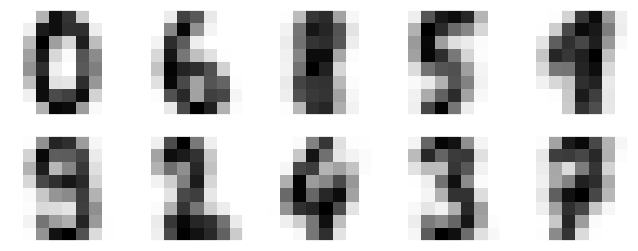

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
numbers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, number in zip(ax.flat, numbers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(number, interpolation='nearest', cmap=plt.cm.binary)

cluster 0
45 elementos


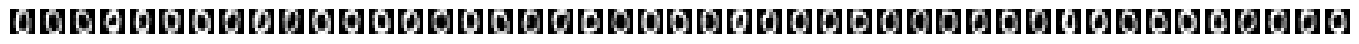

cluster 1
44 elementos


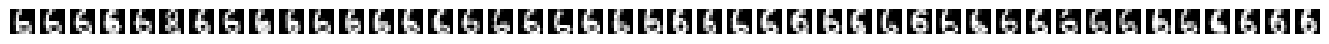

cluster 2
59 elementos


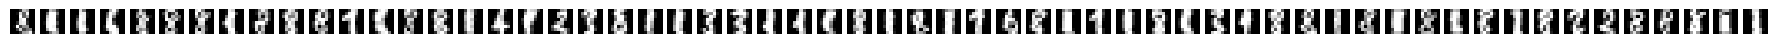

cluster 3
39 elementos


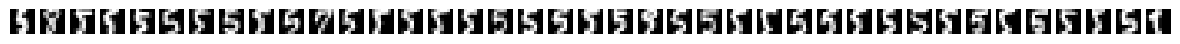

cluster 4
30 elementos


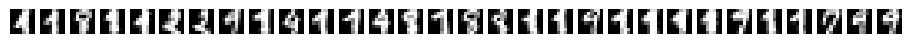

cluster 5
60 elementos


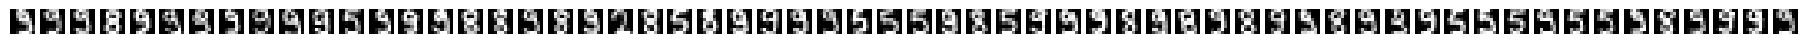

cluster 6
38 elementos


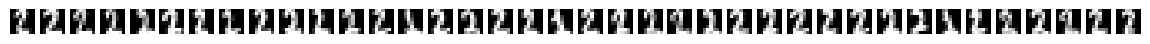

cluster 7
38 elementos


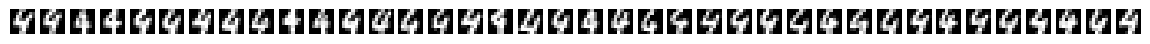

cluster 8
45 elementos


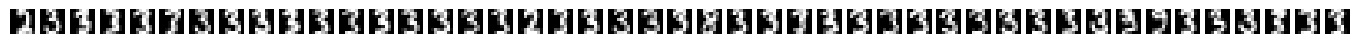

cluster 9
52 elementos


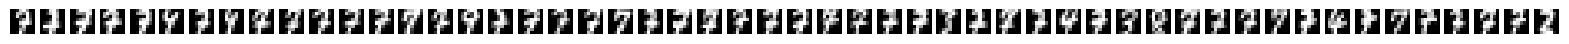

In [ ]:
ypred = kmeans.predict(Xtest)

for i in range(0,10):

    row = np.where(ypred==i)[0]  # las filas en ypred que corresponden al cluster i
    num = row.shape[0]       #  Elementos de cada cluster
    r = int(np.ceil(num/65))    #  Numero de filas para las figuras en el plot, rounded up to ensure at least one row

    print("cluster "+str(i))
    print(str(num)+" elementos")

    plt.figure(figsize=(25,5))
    for k in range(0, num):

        plt.subplot(r, 65, k+1)
        image = Xtest[row[k], ]
        image = image.reshape(8, 8)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

###**IRIS**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Cargamos dataset de iris
iris = datasets.load_iris()

# Imprimimos especies y características
print(iris.target_names)
print(iris.feature_names)

# Dividimos datos para entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target,random_state=5,stratify = iris.target)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Creamos dataframe para los datos de entrenamiento y pruebas
import pandas as pd
X_test=pd.DataFrame({
    'sepal length':Xtest[:,0],
    'sepal width':Xtest[:,1],
    'petal length':Xtest[:,2],
    'petal width':Xtest[:,3],
    'species': ytest
})
X_train=pd.DataFrame({
    'sepal length':Xtrain[:,0],
    'sepal width':Xtrain[:,1],
    'petal length':Xtrain[:,2],
    'petal width':Xtrain[:,3],
    'species': ytrain
})


X_train.head()

,sepal length,sepal width,petal length,petal width,species
0,6.5,3.0,5.8,2.2,2
1,6.3,2.5,5.0,1.9,2
2,6.1,2.9,4.7,1.4,1
3,7.9,3.8,6.4,2.0,2
4,5.8,2.7,3.9,1.2,1


In [ ]:
from sklearn.cluster import KMeans

# Se aplica el algoritmo y se encuentra los centroides de los grupos
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train.drop(["species"],axis = 1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
kmeans.cluster_centers_

array([[4.99473684, 3.43421053, 1.46842105, 0.25526316],
       [5.9877551 , 2.75918367, 4.51020408, 1.46530612],
       [6.856     , 3.128     , 5.772     , 2.124     ]])

In [ ]:
import statistics as stat
import numpy as np

# Realizamos la predicción con los datos de prueba
y_pred = kmeans.predict(X_test.drop(["species"],axis = 1))

for i in range(0,3):

    row = np.where(y_pred==i)[0]  # Filas en y_pred que corresponden con el cluster i
    num = row.shape[0]       #  Elementos de cada cluster
    r = np.floor(num/10)    #  Numero de filas para las figuras en el plot

    print("cluster "+str(i))
    print(str(num)+" elementos")

    templist = []
    for k in range(0, num):
        templist.append(X_test.iloc[row[k], ].species)

    print('Clase asociada al cluster:',stat.mode(templist))

cluster 0
12 elementos
Clase asociada al cluster: 0.0
cluster 1
15 elementos
Clase asociada al cluster: 1.0
cluster 2
11 elementos
Clase asociada al cluster: 2.0


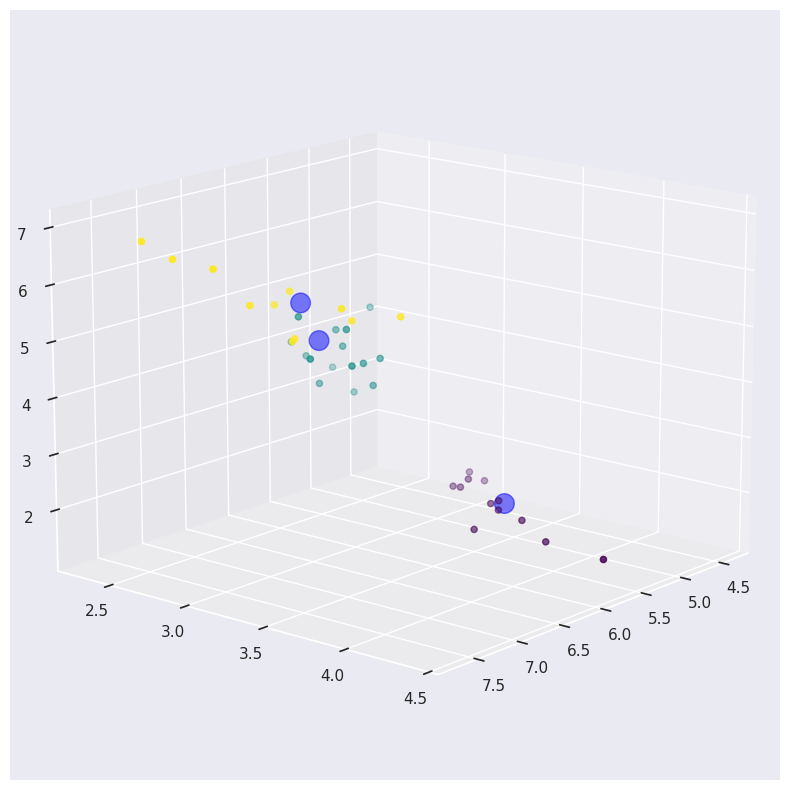

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ax.view_init(15, 40)

ax.scatter(X_test['sepal length'], X_test['sepal width'],X_test['petal length'],c=y_pred,cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c ='blue',s=200,alpha = 0.5)

plt.show()

In [ ]:
y_pred

array([0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1], dtype=int32)

In [ ]:
ytest

array([0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(ytest,y_pred)
print(matriz)

[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]
